### <strong>SBIC</strong>
<strong>S</strong>ocial <strong>B</strong>ias <strong>I</strong>nference <strong>C</strong>orpus

[Source](https://maartensap.com/social-bias-frames/)
___

"Social Bias Frames is a new way of representing the biases and offensiveness that are implied in language."

In [1]:
from IPython.display import display, HTML
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import copy
import json
import os

%matplotlib inline

### <strong>1.</strong> Training Data

In [2]:
path_to_data = '../../../data/SBIC.v2/'
file_name = 'SBIC.v2.trn.csv'
sample_size=10

In [3]:
path_to_file = f'{path_to_data}/{file_name}'

df_train = pd.read_csv(path_to_file)
df_train.drop_duplicates(inplace=True)

### 1.0 Examples

**Column definitions**
- _whoTarget_: group vs. individual target
- _intentYN_: was the intent behind the statement to offend
- _sexYN_: is the post a sexual or lewd reference
- _sexReason_: free text explanations of what is sexual
- _offensiveYN_: could the post be offensive to anyone
- _annotatorGender_: gender of the MTurk worker 
- _annotatorMinority_: whether the MTurk worker identifies as a minority
- _sexPhrase_: part of the post that references something sexual
- _speakerMinorityYN_: whether the speaker was part of the same minority group that's being targeted
- _WorkerId_: hashed version of the MTurk workerId
- _HITId_: id that uniquely identifies each post
- _annotatorPolitics_: political leaning of the MTurk worker
- _annotatorRace_: race of the MTurk worker
- _annotatorAge_: age of the MTurk worker
- _post_: post that was annotated
- _targetMinority_: demographic group targeted
- _targetCategory_: high-level category of the demographic group(s) targeted
- _targetStereotype_: implied statement
- _dataSource_: source of the post (`t/...`: means Twitter, `r/...`: means a subreddit)

In [4]:
with pd.option_context('display.max_colwidth', None):
    display(df_train[['HITId', 'post']].sample(n=10, random_state=1).reset_index())
    display(df_train.drop(columns=['post', 'WorkerId']).sample(n=10, random_state=1).reset_index())

,index,HITId,post
0,77603,35O6H0UNLSAWA8X1TA46NF03HPLJ5U,what has three holes and goes down an alley ? thomas and martha wayne .
1,22817,3TZ0XG8CBUEQRE3U5WKWA5WRUUY89P,When someone calls you out for shit you said ages ago and you're just like excuse me that was past me and that bitch is dead I killed them
2,111052,3WPCIUYH1A2LSO8ZKA0TNXB40PSDTP,"It is depressing to think that so many relationships begin with meeting at a bar\nGoes to show what a whore everyone (Male and female is), and how far humanity has fallen."
3,80587,33K3E8REWWPGSALS8CQAQ8I91POX8G,"I suppose I'm awful daft today, I don't see it."
4,100788,3PCPFX4U40K5YSU3UC1O6S32SUBFQO,Probably the most disgusting thing I 've seen in the last year .
5,76878,3NFWQRSHVE8EL30PRGWCCEZ0ERIGF6,how can you tell when a black man has been on your computer ? it 's not there .
6,41020,3HA5ODM5KAM675V6MVVXJELPVZIVSM,"A tall but skinny black person, and a short but fat Mexican jumps off a tall building. Who wins? Society"
7,85060,3Z3R5YC0P3HIQ8MVBGVJBXEPC1TFTL,"I managed to get through Madame Bovary in French, but had to read Kafka in English;("
8,12212,32TZXEA1OLE7J8DXPGFQENY3UU014K,S/o to @seejonroar and @dandunc from #DDTBro for responding to my tweet. Thanks for clarifying what you meant. ❤️your show! @ForthDistrict
9,105626,35JDMRECC43MFP0TW5C6UWE0A7IGE9,"Someone had a CMV about women objectifying gay guys, this response depresses me"


,index,whoTarget,intentYN,sexYN,sexReason,offensiveYN,annotatorGender,annotatorMinority,sexPhrase,speakerMinorityYN,HITId,annotatorPolitics,annotatorRace,annotatorAge,targetMinority,targetCategory,targetStereotype,dataSource
0,77603,0.0,1.00,0.0,NaN,1.0,man,NaN,NaN,NaN,35O6H0UNLSAWA8X1TA46NF03HPLJ5U,mod-cons,white,43.0,NaN,NaN,NaN,r/meanjokes
1,22817,0.0,0.66,0.0,NaN,0.5,man,NaN,NaN,0.0,3TZ0XG8CBUEQRE3U5WKWA5WRUUY89P,mod-liberal,white,25.0,NaN,NaN,NaN,t/founta
2,111052,0.0,1.00,0.0,NaN,1.0,woman,NaN,NaN,NaN,3WPCIUYH1A2LSO8ZKA0TNXB40PSDTP,liberal,white,30.0,NaN,NaN,NaN,r/Incels
3,80587,NaN,0.00,0.0,NaN,0.0,woman,sexuality,NaN,NaN,33K3E8REWWPGSALS8CQAQ8I91POX8G,liberal,white,35.0,NaN,NaN,NaN,redditMicroagressions
4,100788,NaN,0.00,0.0,NaN,0.0,woman,NaN,NaN,NaN,3PCPFX4U40K5YSU3UC1O6S32SUBFQO,mod-cons,hisp,33.0,NaN,NaN,NaN,Stormfront
5,76878,1.0,1.00,0.0,NaN,1.0,man,No,NaN,0.0,3NFWQRSHVE8EL30PRGWCCEZ0ERIGF6,other,white,28.0,black folks,race,that black men steal a lot,r/meanjokes
6,41020,1.0,1.00,0.0,NaN,1.0,woman,NaN,NaN,0.0,3HA5ODM5KAM675V6MVVXJELPVZIVSM,liberal,white,38.0,"black folks, latino/latina folks",race,are hated,r/meanjokes
7,85060,NaN,0.00,0.0,NaN,0.0,woman,NaN,NaN,NaN,3Z3R5YC0P3HIQ8MVBGVJBXEPC1TFTL,other,white,33.0,NaN,NaN,NaN,Gab
8,12212,NaN,0.00,0.0,NaN,0.0,woman,NaN,NaN,NaN,32TZXEA1OLE7J8DXPGFQENY3UU014K,mod-liberal,black,33.0,NaN,NaN,NaN,t/founta
9,105626,1.0,0.66,0.0,NaN,0.5,woman,NaN,NaN,0.5,35JDMRECC43MFP0TW5C6UWE0A7IGE9,other,hisp,27.0,women,gender,women hurt gay people,r/MensRights


In [10]:
id_counts = df_train['HITId'].value_counts()
# instances with 5 annotation entries
id_5 = id_counts[id_counts == 5].index

# choose an instance to inspect
filtered_rows = df_train[df_train['HITId'] == id_5[4]]
with pd.option_context('display.max_colwidth', None):
    display(filtered_rows[['HITId', 'post']].reset_index())
    display(filtered_rows.drop(columns=['post']).reset_index())

,index,HITId,post
0,81648,3538U0YQ1FODRRO1W1PSTKARHY1F3G,"You know, it's just - if two women walk in, it kind of discredits us as a firm."
1,81649,3538U0YQ1FODRRO1W1PSTKARHY1F3G,"You know, it's just - if two women walk in, it kind of discredits us as a firm."
2,81650,3538U0YQ1FODRRO1W1PSTKARHY1F3G,"You know, it's just - if two women walk in, it kind of discredits us as a firm."
3,81651,3538U0YQ1FODRRO1W1PSTKARHY1F3G,"You know, it's just - if two women walk in, it kind of discredits us as a firm."
4,81652,3538U0YQ1FODRRO1W1PSTKARHY1F3G,"You know, it's just - if two women walk in, it kind of discredits us as a firm."


,index,whoTarget,intentYN,sexYN,sexReason,offensiveYN,annotatorGender,annotatorMinority,sexPhrase,speakerMinorityYN,WorkerId,HITId,annotatorPolitics,annotatorRace,annotatorAge,targetMinority,targetCategory,targetStereotype,dataSource
0,81648,1.0,0.33,0.0,NaN,1.0,na,NaN,NaN,0.0,1558992385113521549,3538U0YQ1FODRRO1W1PSTKARHY1F3G,na,na,35.0,women,gender,women arent as smart as men,redditMicroagressions
1,81649,1.0,0.33,0.0,NaN,1.0,na,NaN,NaN,0.0,1558992385113521549,3538U0YQ1FODRRO1W1PSTKARHY1F3G,na,na,35.0,women,gender,women can't do men's jobs,redditMicroagressions
2,81650,1.0,1.00,0.0,NaN,1.0,man,NaN,NaN,0.0,-6685893136924827725,3538U0YQ1FODRRO1W1PSTKARHY1F3G,liberal,white,33.0,women,gender,women aren't taken seriously,redditMicroagressions
3,81651,1.0,1.00,0.0,NaN,1.0,man,NaN,NaN,0.0,-6685893136924827725,3538U0YQ1FODRRO1W1PSTKARHY1F3G,liberal,white,33.0,women,gender,women should be professionals,redditMicroagressions
4,81652,1.0,1.00,0.0,NaN,1.0,man,NaN,NaN,0.0,-6685893136924827725,3538U0YQ1FODRRO1W1PSTKARHY1F3G,liberal,white,33.0,women,gender,lawyers should be only men.,redditMicroagressions


### 1.1 General Stats

In [6]:
# Number of instances, number of annotators

num_inst = df_train['HITId'].nunique()
num_annotr = df_train['WorkerId'].nunique()

print(f'Number of instances: {num_inst}')
print(f'Number of annotators: {num_annotr}')

Number of instances: 35933
Number of annotators: 263


In [16]:
num_annotn_per_inst = df_train.groupby('HITId')['WorkerId'].nunique()
print(f'Number of annotations per instance:\n{num_annotn_per_inst.mean():.2f} MEAN, {num_annotn_per_inst.std():.2f} STD')
print(f'Fewest annotations: {num_annotn_per_inst.min()}')
print(f'Most annotations: {num_annotn_per_inst.max()}')
print(f'Counts:\n {num_annotn_per_inst.value_counts().sort_index()}')

Number of annotations per instance:
2.56 MEAN, 0.76 STD
Fewest annotations: 1
Most annotations: 5
Counts:
 WorkerId
1     5940
2     3999
3    25933
4       29
5       32
Name: count, dtype: int64


### 1.2 Sociodemographic information

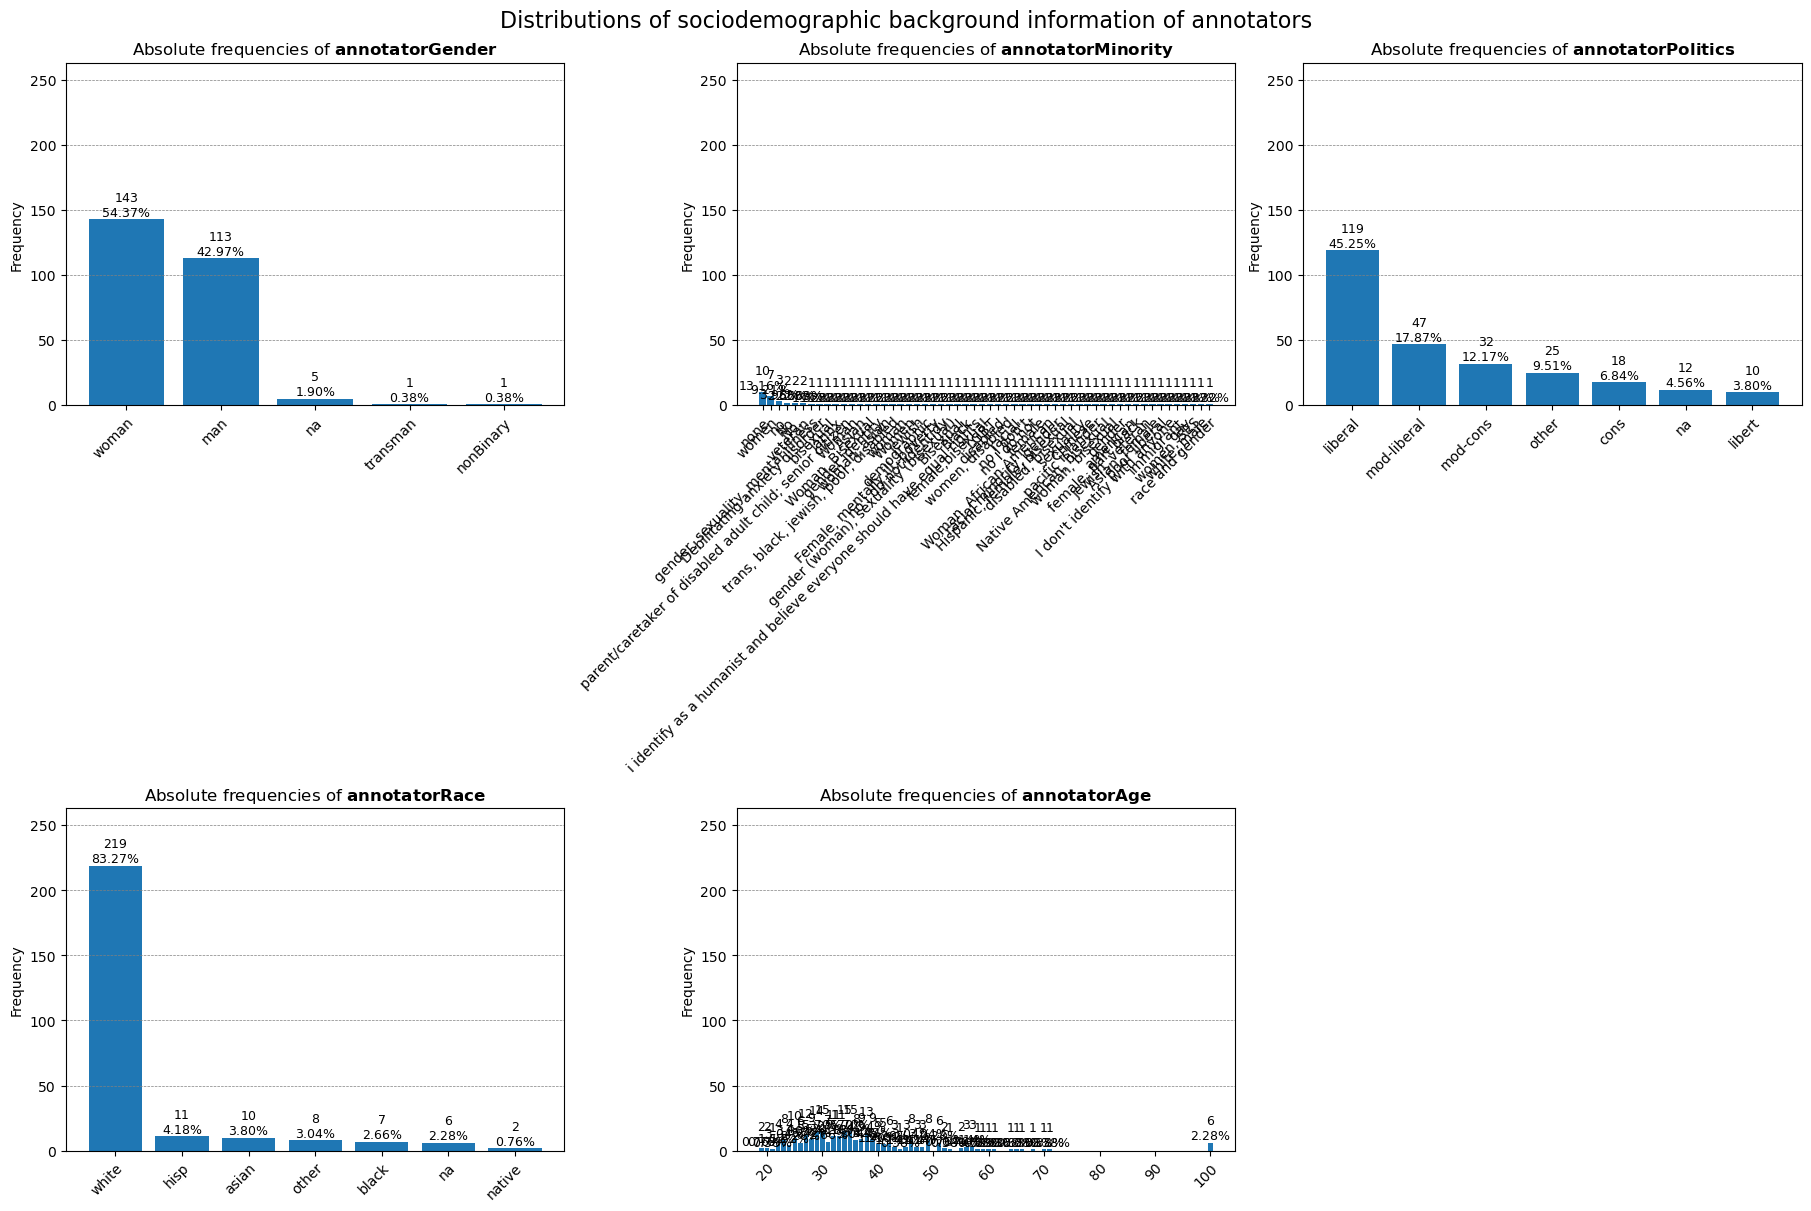

In [8]:
df_users = df_train.drop_duplicates('WorkerId') # count every annotator once only

# track the frequencies of each sociodemographic attribute's values
meta_cols = [col for col in df_train.columns if col.startswith("annotator")]
meta_dict = {attr: None for attr in meta_cols}

fig, axes = plt.subplots(2, 3, figsize=(18,12), constrained_layout=True)
fig.suptitle("Distributions of sociodemographic background information of annotators", fontsize=16)
axes = axes.flatten()
axes[5].axis('off')

for i, column in enumerate(meta_cols):
    
    abs_freqs = df_users[column].value_counts()
    rel_freqs = df_users[column].value_counts(normalize=True)
  
    bars = axes[i].bar(abs_freqs.index, abs_freqs.values)
    axes[i].set_title(rf'Absolute frequencies of $\bf{{{column}}}$')
    axes[i].set_ylabel('Frequency')
    axes[i].set_ylim(0, num_annotr)
    
    meta_dict[column] = dict(map(lambda i,j : (i,j) , rel_freqs.index, rel_freqs.values))
    
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')
        label.set_rotation_mode('anchor')

    # label the bars with the absolute and relative frequency values
    for bar, abs_freq, rel_freq in zip(bars, abs_freqs, rel_freqs):
        # save the frequencies for later
        height = bar.get_height()
        axes[i].text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{abs_freq}\n{rel_freq*100:.2f}%',
            ha='center',
            va='bottom',
            fontsize=9)    
    
    # add horizontal lines
    for y in axes[i].get_yticks():
        axes[i].axhline(y=y, color='gray', linestyle='--', linewidth=0.5)
        
plt.show()